Github[]

LAS VEGAS STRIP TRIP ADVISOR
==

*Laura Mercedes Coronado Múnera*

DESCRIPCIÓN DEL PROBLEMA REAL
==

Sistema de calificación de hoteles basado en las respuestas brindadas por los clientes en TripAdvisor.

DESCRIPCIÓN DEL PROBLEMA EN TREMINOS DE LOS DATOS
==

Es una muestra de 504 datos, cada registro tiene 20 atributos que contempla la calificación del hotel según TripAdvisor.

**Number of Instances:** 504

**Area:** Business

**Attribute Characteristics:** Integer

**Number of Attributes:** 20

**Date Donated:** 2017-07-23

**Associated Tasks:** Classification, Regression

**Moro, S., Rita, P., & Coelho, J.** (2017). Stripping customers' feedback on hotels through data mining: The case of Las Vegas Strip. Tourism Management Perspectives, 23, 41-52.

Libraries
==

In [39]:
library('readr')
library('caret')
library('lattice')
library('ggplot2')
library('OneR')
library('GoodmanKruskal')
library('C50')
library("caret")
library("lattice")
library("gmodels")

In [40]:
dataset<-read.csv('LasVegasTripAdvisorReviews-Dataset.csv',sep=";")
str(dataset)

'data.frame':	504 obs. of  20 variables:
 $ User.country     : Factor w/ 48 levels "Australia","Belgium",..: 47 47 47 46 4 4 46 47 18 4 ...
 $ Nr..reviews      : int  11 119 36 14 5 31 45 2 24 12 ...
 $ Nr..hotel.reviews: int  4 21 9 7 5 8 12 1 3 7 ...
 $ Helpful.votes    : int  13 75 25 14 2 27 46 4 8 11 ...
 $ Score            : int  5 3 5 4 4 3 4 4 4 3 ...
 $ Period.of.stay   : Factor w/ 4 levels "Dec-Feb","Jun-Aug",..: 1 1 3 3 3 3 3 3 3 3 ...
 $ Traveler.type    : Factor w/ 5 levels "Business","Couples",..: 4 1 3 4 5 2 2 3 4 3 ...
 $ Pool             : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Gym              : Factor w/ 2 levels "NO","YES": 2 2 2 2 2 2 2 2 2 2 ...
 $ Tennis.court     : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Spa              : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Casino           : Factor w/ 2 levels "NO","YES": 2 2 2 2 2 2 2 2 2 2 ...
 $ Free.internet    : Factor w/ 2 levels "NO","YES": 2 2 2 2 2 2 2 2 2 2 .

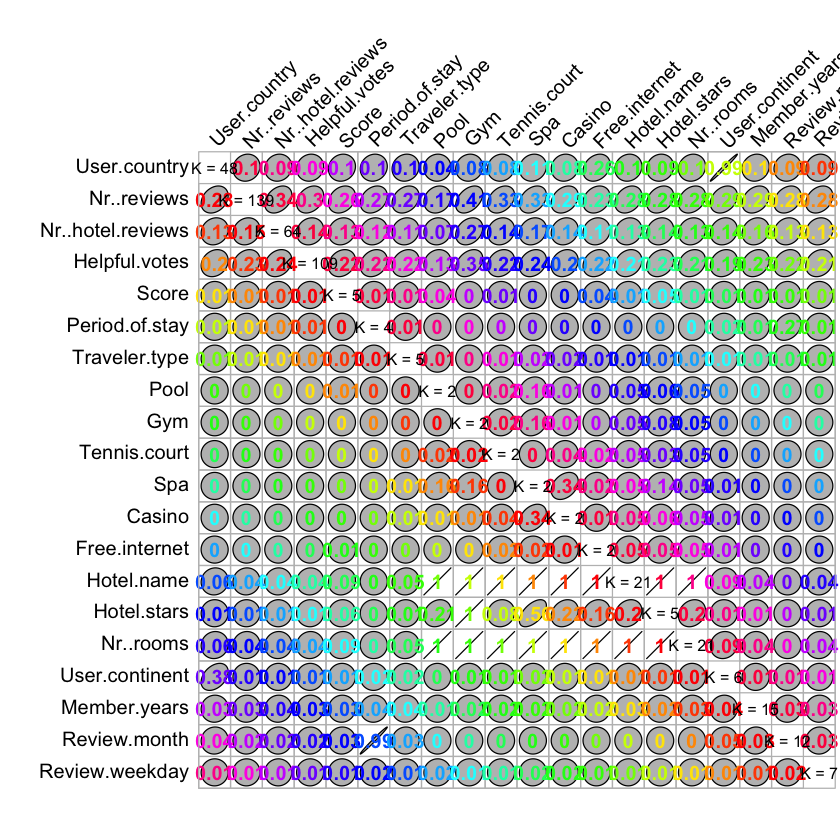

In [41]:
corrmatrix<-GKtauDataframe(dataset, dgts = 2, includeNA = "ifany")
plot(corrmatrix, colorPlot = TRUE, corrColors = NULL,
backgroundColor = "gray", diagColor = "black", diagSize = .8)

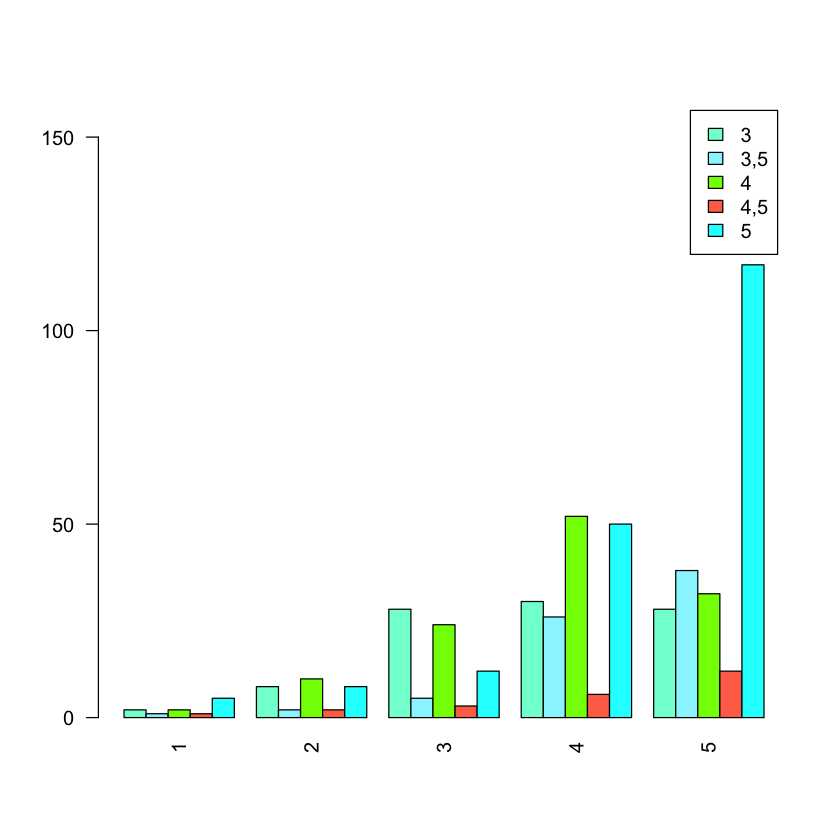

In [42]:
barplotdata<- dataset[,c('Hotel.stars','Score')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("aquamarine","cadetblue1","chartreuse","coral1","cyan"), beside=TRUE,ylim=c(0,160),legend = rownames(barplotdata))

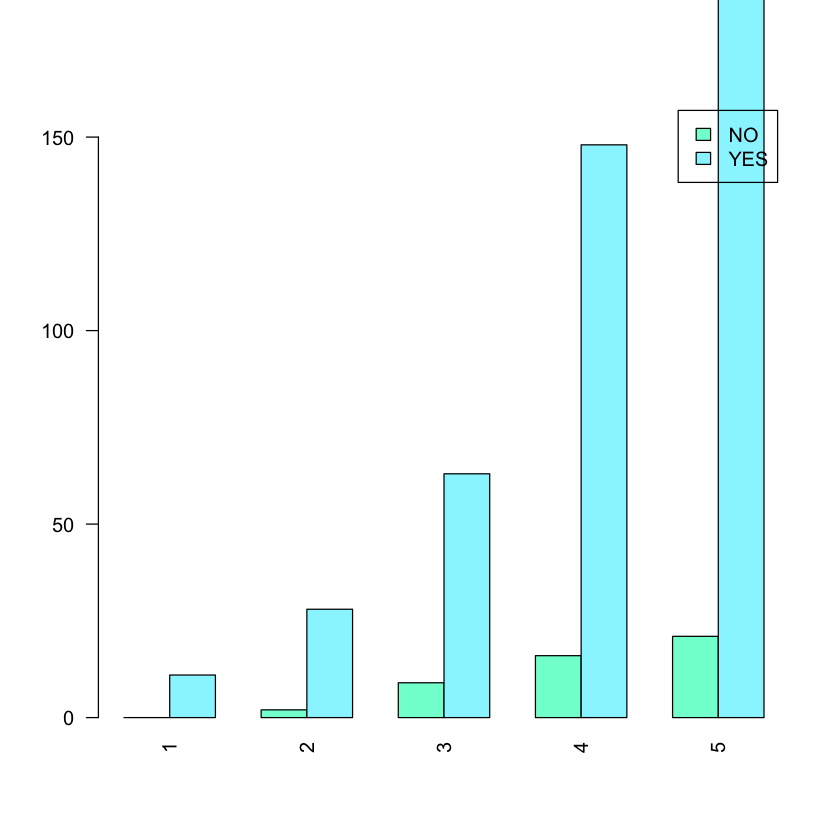

In [43]:
barplotdata<- dataset[,c('Casino','Score')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("aquamarine","cadetblue1"), beside=TRUE,ylim=c(0,160),legend = rownames(barplotdata))

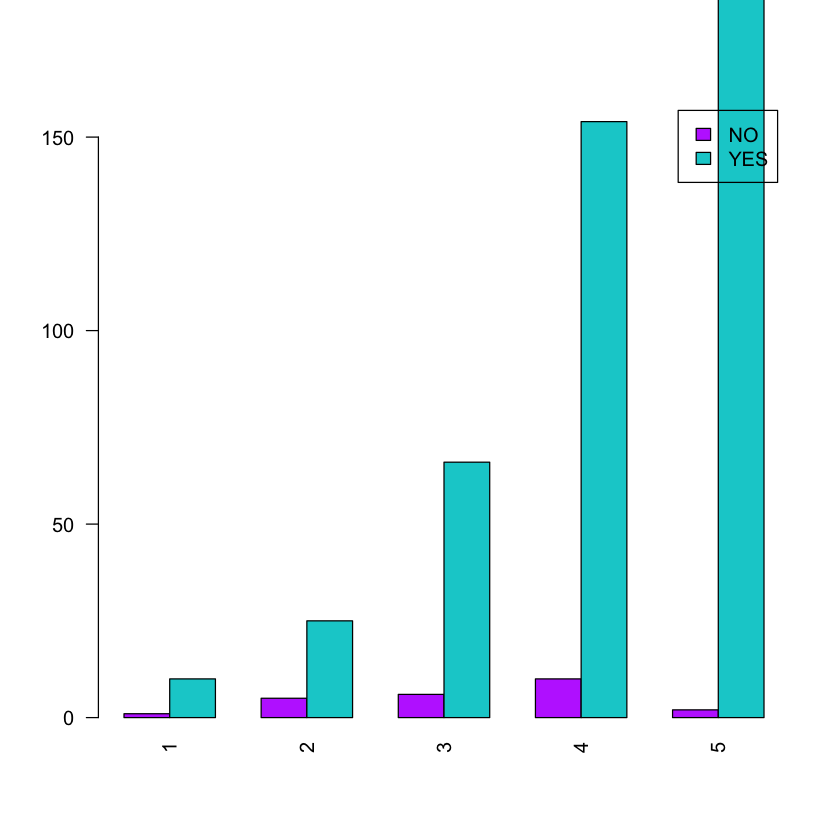

In [44]:
barplotdata<- dataset[,c('Free.internet','Score')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("darkorchid1","darkturquoise"), beside=TRUE,ylim=c(0,160),legend = rownames(barplotdata))

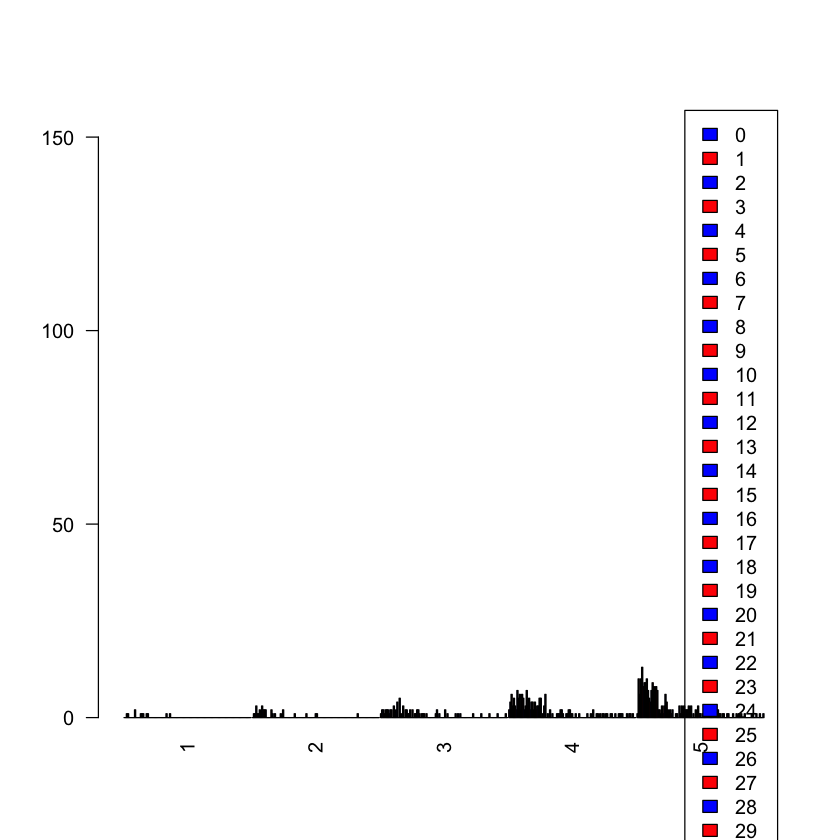

In [45]:
barplotdata<- dataset[,c('Helpful.votes','Score')]
barplotdata <- table(barplotdata)
barplot(barplotdata,las=2,col=c("blue","red"), beside=TRUE,ylim=c(0,160),legend = rownames(barplotdata))

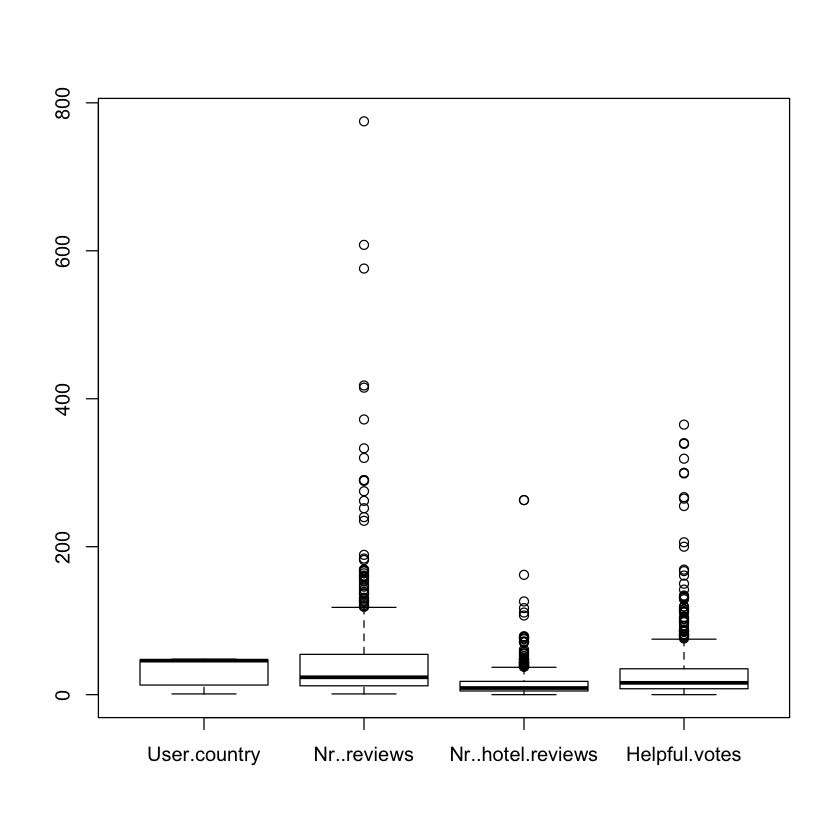

In [46]:
dataset<-dataset[,-14] #Hotel name
dataset<- dataset[,-15] #Nr rooms
dataset<-dataset[-19] #Review day
datasety<-dataset[1:4]
datasetx<-dataset[4:17]
boxplot(datasety)

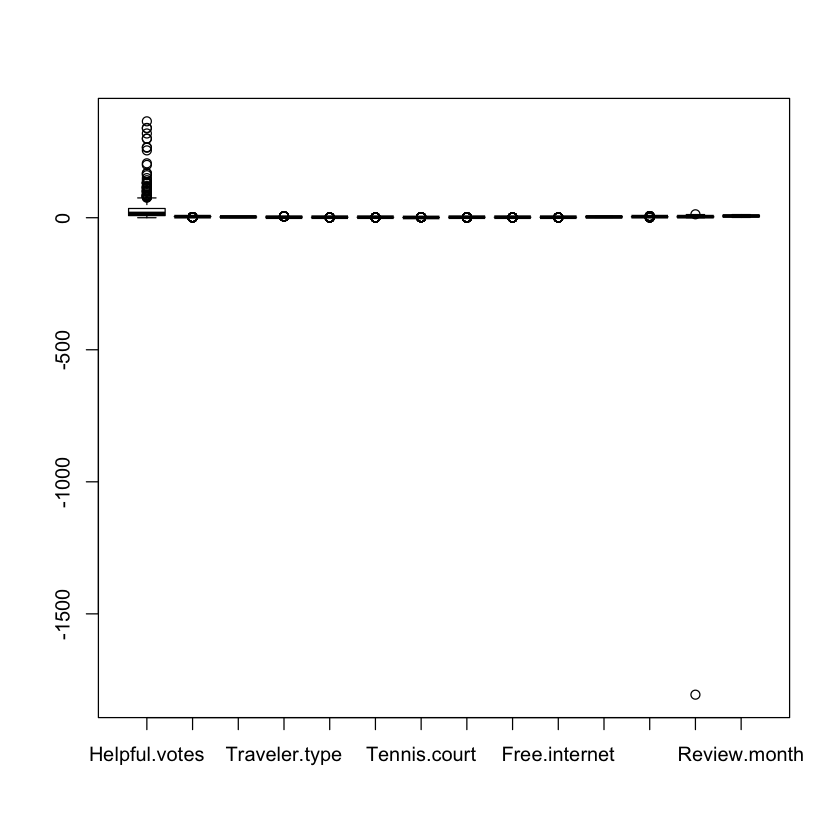

In [47]:
boxplot(datasetx)

In [48]:
dataset$Score<-as.factor(dataset$Score)
dataset$Nr..reviews<-as.factor(dataset$Nr..reviews)
dataset$Nr..hotel.reviews<-as.factor(dataset$Nr..hotel.reviews)
dataset$Helpful.votes<-as.factor(dataset$Helpful.votes)
str(dataset)

'data.frame':	504 obs. of  18 variables:
 $ User.country     : Factor w/ 48 levels "Australia","Belgium",..: 47 47 47 46 4 4 46 47 18 4 ...
 $ Nr..reviews      : Factor w/ 139 levels "1","2","3","4",..: 11 100 36 14 5 31 45 2 24 12 ...
 $ Nr..hotel.reviews: Factor w/ 64 levels "0","1","3","4",..: 4 21 9 7 5 8 12 2 3 7 ...
 $ Helpful.votes    : Factor w/ 109 levels "0","1","2","3",..: 14 67 26 15 3 28 45 5 9 12 ...
 $ Score            : Factor w/ 5 levels "1","2","3","4",..: 5 3 5 4 4 3 4 4 4 3 ...
 $ Period.of.stay   : Factor w/ 4 levels "Dec-Feb","Jun-Aug",..: 1 1 3 3 3 3 3 3 3 3 ...
 $ Traveler.type    : Factor w/ 5 levels "Business","Couples",..: 4 1 3 4 5 2 2 3 4 3 ...
 $ Pool             : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Gym              : Factor w/ 2 levels "NO","YES": 2 2 2 2 2 2 2 2 2 2 ...
 $ Tennis.court     : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Spa              : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Casino 

C5.0
==

In [49]:
train_sample <- 1:400
str(train_sample)
X_train      <- dataset[ train_sample, -5]
X_test       <- dataset[-train_sample, -5]

y_train_true <- dataset$Score[train_sample]
y_test_true  <- dataset$Score[-train_sample]

prop.table(table(y_train_true))
prop.table(table(y_test_true))

 int [1:400] 1 2 3 4 5 6 7 8 9 10 ...


y_train_true
     1      2      3      4      5 
0.0275 0.0575 0.1475 0.3125 0.4550 

y_test_true
         1          2          3          4          5 
0.00000000 0.06730769 0.12500000 0.37500000 0.43269231 

In [50]:
str(dataset)
clf <- C5.0(X_train, y_train_true)
clf

'data.frame':	504 obs. of  18 variables:
 $ User.country     : Factor w/ 48 levels "Australia","Belgium",..: 47 47 47 46 4 4 46 47 18 4 ...
 $ Nr..reviews      : Factor w/ 139 levels "1","2","3","4",..: 11 100 36 14 5 31 45 2 24 12 ...
 $ Nr..hotel.reviews: Factor w/ 64 levels "0","1","3","4",..: 4 21 9 7 5 8 12 2 3 7 ...
 $ Helpful.votes    : Factor w/ 109 levels "0","1","2","3",..: 14 67 26 15 3 28 45 5 9 12 ...
 $ Score            : Factor w/ 5 levels "1","2","3","4",..: 5 3 5 4 4 3 4 4 4 3 ...
 $ Period.of.stay   : Factor w/ 4 levels "Dec-Feb","Jun-Aug",..: 1 1 3 3 3 3 3 3 3 3 ...
 $ Traveler.type    : Factor w/ 5 levels "Business","Couples",..: 4 1 3 4 5 2 2 3 4 3 ...
 $ Pool             : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Gym              : Factor w/ 2 levels "NO","YES": 2 2 2 2 2 2 2 2 2 2 ...
 $ Tennis.court     : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Spa              : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ Casino 


Call:
C5.0.default(x = X_train, y = y_train_true)

Classification Tree
Number of samples: 400 
Number of predictors: 17 

Tree size: 0 

Non-standard options: attempt to group attributes


Rpart
==

In [52]:
train_sample1 <- 1:floor(nrow(dataset)*0.91)
X_train1     <- dataset[ train_sample1, ]
X_test1       <- dataset[-train_sample1, ]

In [53]:
rtrain<- train(Score~.,data=X_train1,method="rpart")

y_test_pred1 <- predict(rtrain, X_test1)
CrossTable(X_test1$Score, 
           y_test_pred1,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('actual answer', 'predicted answer'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  46 

 
              | y_test_pred 
X_test1$Score |         5 | Row Total | 
--------------|-----------|-----------|
            2 |         4 |         4 | 
              |     0.087 |           | 
--------------|-----------|-----------|
            3 |         9 |         9 | 
              |     0.196 |           | 
--------------|-----------|-----------|
            4 |        18 |        18 | 
              |     0.391 |           | 
--------------|-----------|-----------|
            5 |        15 |        15 | 
              |     0.326 |           | 
--------------|-----------|-----------|
 Column Total |        46 |        46 | 
--------------|-----------|-----------|

 


knn
==

In [54]:
knntrain<- train(Score~.,data=X_train1,method="knn")

y_test_pred2 <- predict(knntrain, X_test1)
CrossTable(X_test1$Score, 
           y_test_pred2,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('actual answer', 'predicted answer'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  46 

 
              | y_test_pred 
X_test1$Score |         5 | Row Total | 
--------------|-----------|-----------|
            2 |         4 |         4 | 
              |     0.087 |           | 
--------------|-----------|-----------|
            3 |         9 |         9 | 
              |     0.196 |           | 
--------------|-----------|-----------|
            4 |        18 |        18 | 
              |     0.391 |           | 
--------------|-----------|-----------|
            5 |        15 |        15 | 
              |     0.326 |           | 
--------------|-----------|-----------|
 Column Total |        46 |        46 | 
--------------|-----------|-----------|

 


OneR Score
==

In [56]:
clf<-OneR(Score ~ ., data = dataset, verbose = TRUE) #adicionar helpful votes
clf

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
“data contains unused factor levels”


    Attribute         Accuracy
1 * Nr..reviews       58.93%  
2   Helpful.votes     58.53%  
3   Nr..hotel.reviews 53.37%  
4   User.country      50.99%  
5   Hotel.stars       49.4%   
6   Traveler.type     46.83%  
7   Free.internet     46.63%  
7   User.continent    46.63%  
9   Pool              46.43%  
10  Review.month      46.03%  
11  Review.weekday    45.63%  
12  Period.of.stay    45.04%  
12  Gym               45.04%  
12  Tennis.court      45.04%  
12  Spa               45.04%  
12  Casino            45.04%  
12  Member.years      45.04%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = Score ~ ., data = dataset, verbose = TRUE)

Rules:
If Nr..reviews = 1   then Score = 5
If Nr..reviews = 2   then Score = 5
If Nr..reviews = 3   then Score = 3
If Nr..reviews = 4   then Score = 5
If Nr..reviews = 5   then Score = 5
If Nr..reviews = 6   then Score = 5
If Nr..reviews = 7   then Score = 4
If Nr..reviews = 8   then Score = 5
If Nr..reviews = 9   then Score = 5
If Nr..reviews = 10  then Score = 5
If Nr..reviews = 11  then Score = 5
If Nr..reviews = 12  then Score = 5
If Nr..reviews = 13  then Score = 4
If Nr..reviews = 14  then Score = 5
If Nr..reviews = 15  then Score = 5
If Nr..reviews = 16  then Score = 5
If Nr..reviews = 17  then Score = 5
If Nr..reviews = 18  then Score = 5
If Nr..reviews = 19  then Score = 4
If Nr..reviews = 20  then Score = 4
If Nr..reviews = 21  then Score = 5
If Nr..reviews = 22  then Score = 4
If Nr..reviews = 23  then Score = 3
If Nr..reviews = 24  then Score = 4
If Nr..reviews = 25  then Score = 5
If Nr..reviews = 26

In [57]:
summary(clf)


Call:
OneR.formula(formula = Score ~ ., data = dataset, verbose = TRUE)

Rules:
If Nr..reviews = 1   then Score = 5
If Nr..reviews = 2   then Score = 5
If Nr..reviews = 3   then Score = 3
If Nr..reviews = 4   then Score = 5
If Nr..reviews = 5   then Score = 5
If Nr..reviews = 6   then Score = 5
If Nr..reviews = 7   then Score = 4
If Nr..reviews = 8   then Score = 5
If Nr..reviews = 9   then Score = 5
If Nr..reviews = 10  then Score = 5
If Nr..reviews = 11  then Score = 5
If Nr..reviews = 12  then Score = 5
If Nr..reviews = 13  then Score = 4
If Nr..reviews = 14  then Score = 5
If Nr..reviews = 15  then Score = 5
If Nr..reviews = 16  then Score = 5
If Nr..reviews = 17  then Score = 5
If Nr..reviews = 18  then Score = 5
If Nr..reviews = 19  then Score = 4
If Nr..reviews = 20  then Score = 4
If Nr..reviews = 21  then Score = 5
If Nr..reviews = 22  then Score = 4
If Nr..reviews = 23  then Score = 3
If Nr..reviews = 24  then Score = 4
If Nr..reviews = 25  then Score = 5
If Nr..reviews = 26

OneR Helpful votes
==

In [58]:
dataset<-read.csv('LasVegasTripAdvisorReviews-Dataset.csv',sep=";")
dataset<- dataset[,-20]
dataset<- dataset[,-19]
dataset<-dataset[,-14]
dataset<- dataset[,-1]
dataset<- dataset[,-5]
dataset<-dataset[,-5]
dataset<-dataset[,-13]
clf1<-OneR(Helpful.votes ~ ., data = dataset, verbose = TRUE) #adicionar helpful votes
clf1

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
“data contains unused factor levels”


    Attribute         Accuracy
1 * Nr..reviews       92.66%  
2   Nr..hotel.reviews 92.26%  
3   Score             90.08%  
3   Pool              90.08%  
3   Gym               90.08%  
3   Tennis.court      90.08%  
3   Spa               90.08%  
3   Casino            90.08%  
3   Free.internet     90.08%  
3   Hotel.stars       90.08%  
3   Nr..rooms         90.08%  
3   Member.years      90.08%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = Helpful.votes ~ ., data = dataset, verbose = TRUE)

Rules:
If Nr..reviews = (0.226,156] then Helpful.votes = (-0.365,73]
If Nr..reviews = (156,311]   then Helpful.votes = (73,146]
If Nr..reviews = (311,465]   then Helpful.votes = (73,146]
If Nr..reviews = (465,620]   then Helpful.votes = (292,365]
If Nr..reviews = (620,776]   then Helpful.votes = (219,292]

Accuracy:
467 of 504 instances classified correctly (92.66%)


In [59]:
summary(clf1)


Call:
OneR.formula(formula = Helpful.votes ~ ., data = dataset, verbose = TRUE)

Rules:
If Nr..reviews = (0.226,156] then Helpful.votes = (-0.365,73]
If Nr..reviews = (156,311]   then Helpful.votes = (73,146]
If Nr..reviews = (311,465]   then Helpful.votes = (73,146]
If Nr..reviews = (465,620]   then Helpful.votes = (292,365]
If Nr..reviews = (620,776]   then Helpful.votes = (219,292]

Accuracy:
467 of 504 instances classified correctly (92.66%)

Contingency table:
             Nr..reviews
Helpful.votes (0.226,156] (156,311] (311,465] (465,620] (620,776] Sum
  (-0.365,73]       * 451         3         0         0         0 454
  (73,146]             22      * 11       * 2         0         0  35
  (146,219]             3         1         2         0         0   6
  (219,292]             0         1         1         0       * 1   3
  (292,365]             1         3         0       * 2         0   6
  Sum                 477        19         5         2         1 504
---
Maximum in

Evaluación
==

**Accuracy**

Al eliminar las columnas que contienen datos de nivel, se mejora considerablemente la precisión del modelo, cambio del *33,73%*. Por lo tanto, las variables binarias afectan en mucho el modelo. 

Modelo **4**: *58.93%*

Modelo **5**: *92.66%*

**Matriz de confusión**

Como se pudo determinar desde el pricipio con las tablas de frecuencia, la mayoria de los hoteles ranqueados contaban con un puntaje de 5 estrella, por lo tanto los modelos tendran un peso adicional a esta clasificación. 

Para los modelos **2** y **3**, se observa como el pronostico se carga a la clasificación 5 y se observa pocos falsos positivos, además se destaca la cantidad de verdaderos positivos. 